In [88]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt

In [89]:
project=pd.read_csv("./WorldExpenditures.csv",skipinitialspace=True)
project.head()

,S/N,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,0,2000,Australia,Total function,153122.633,37.36193
1,1,2000,Australia,"Agriculture, forestry, fishing and hunting",2195.583,0.53572
2,2,2000,Australia,"Mining, manufacturing and construction",905.018,0.22082
3,3,2000,Australia,Transport,11417.379,2.78584
4,4,2000,Australia,Fuel and energy,2251.241,0.54930


# Checking for null values


In [90]:
project.isna().sum()

S/N                           0
Year                          0
Country                       0
Sector                        0
Expenditure(million USD)    560
GDP(%)                      560
dtype: int64

# Filling the null values with 0

In [91]:
project.fillna(0,inplace=True)

In [92]:
project.isna().sum()

S/N                         0
Year                        0
Country                     0
Sector                      0
Expenditure(million USD)    0
GDP(%)                      0
dtype: int64

# Checking the data type of each column

In [93]:
project.dtypes

S/N                           int64
Year                          int64
Country                      object
Sector                       object
Expenditure(million USD)    float64
GDP(%)                      float64
dtype: object

# Converting the year column from object to datetime data type and the expenditure column from float to int datatype 

In [94]:
project['Year'] = pd.to_datetime(project['Year'], format='%Y')
project['Expenditure(million USD)'] = project['Expenditure(million USD)'].astype(int)


In [95]:
project.dtypes

S/N                                  int64
Year                        datetime64[ns]
Country                             object
Sector                              object
Expenditure(million USD)             int32
GDP(%)                             float64
dtype: object

# Checking for duplicate data

In [96]:
project.duplicated().sum()

0

# Checking for spelling errors

In [97]:
project.columns

Index(['S/N', 'Year', 'Country', 'Sector', 'Expenditure(million USD)',
       'GDP(%)'],
      dtype='object')

# QUESTION 1. 
# Calculate the total expenditure for each year and create a time series plot to visualize overall spending trends.

# Step 1. Calculating the total expenditure for each year and grouping by year

In [98]:
a = project.groupby(project['Year'].dt.year)['Expenditure(million USD)'].sum()
a

Year
2000    16489039
2001    17282020
2002    18929936
2003    21861130
2004    24377745
2005    30449331
2006    32417652
2007    36096379
2008    42961804
2009    44154385
2010    46156375
2011    50566921
2012    50699667
2013    51558507
2014    52773466
2015    49461425
2016    49971033
2017    52471580
2018    55901780
2019    57482439
2020    65342052
2021    52956193
Name: Expenditure(million USD), dtype: int32

# Step 2. Creating a time series plot to visualize overall spending trends.

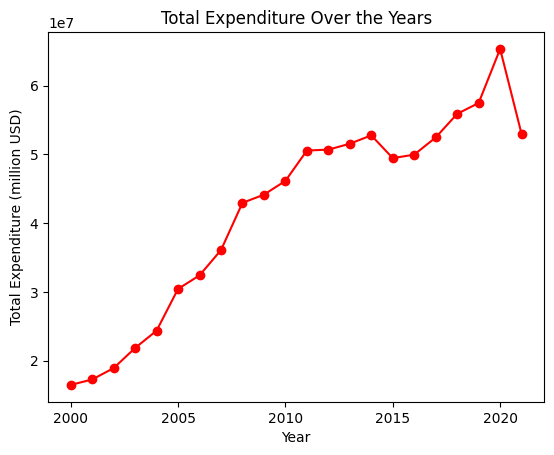

In [99]:

plt.plot(a.index, a.values, marker='o', linestyle='-', color='r')
plt.title('Total Expenditure Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Expenditure (million USD)')
plt.show()

# QUESTION 2.

# Identify years with the highest and lowest spending and investigate the reasons behind
# them.

# Step 1. Group by 'Year' and calculate the total expenditure for each year

In [103]:
b = project.groupby(project['Year'].dt.year)['Expenditure(million USD)'].sum()
b

Year
2000    16489039
2001    17282020
2002    18929936
2003    21861130
2004    24377745
2005    30449331
2006    32417652
2007    36096379
2008    42961804
2009    44154385
2010    46156375
2011    50566921
2012    50699667
2013    51558507
2014    52773466
2015    49461425
2016    49971033
2017    52471580
2018    55901780
2019    57482439
2020    65342052
2021    52956193
Name: Expenditure(million USD), dtype: int32

# Step 2. Identify the year with the highest and lowest spending

In [113]:
highest= b.idxmax()
lowest = b.idxmin()
u=[highest,lowest]
print(f"The highest spending year is {highest} and the year with the lowest spending is {lowest}" )

The highest spending year is 2020 and the year with the lowest spending is 2000


# Investigating the reasons behind the year with the highest spending through providing details about the sectors and countries contributing to the extreme values.

In [123]:
h = project[project['Year'].dt.year == highest]
print(f"Details for the year with the lowest spending:\n{h}")

Details for the year with the lowest spending:
         S/N       Year     Country  \
23312  23312 2020-01-01     Albania   
23313  23313 2020-01-01     Albania   
23314  23314 2020-01-01     Albania   
23315  23315 2020-01-01     Albania   
23316  23316 2020-01-01     Albania   
...      ...        ...         ...   
24631  24631 2020-01-01  Uzbekistan   
24632  24632 2020-01-01  Uzbekistan   
24633  24633 2020-01-01  Uzbekistan   
24634  24634 2020-01-01  Uzbekistan   
24635  24635 2020-01-01  Uzbekistan   

                                           Sector  Expenditure(million USD)  \
23312                              Total function                      4917   
23313  Agriculture, forestry, fishing and hunting                       110   
23314      Mining, manufacturing and construction                         5   
23315                                   Transport                       341   
23316                               Communication                         0   
...       

# Investigating the reasons behind the year with the lowest spending through providing details about the sectors and countries contributing to the extreme values.

In [120]:
l = project[project['Year'].dt.year == lowest]
print(f"Details for the year with the lowest spending:\n{l}")

Details for the year with the lowest spending:
     S/N       Year                   Country  \
0      0 2000-01-01                 Australia   
1      1 2000-01-01                 Australia   
2      2 2000-01-01                 Australia   
3      3 2000-01-01                 Australia   
4      4 2000-01-01                 Australia   
..   ...        ...                       ...   
780  780 2000-01-01  United States of America   
781  781 2000-01-01  United States of America   
782  782 2000-01-01  United States of America   
783  783 2000-01-01  United States of America   
784  784 2000-01-01  United States of America   

                                         Sector  Expenditure(million USD)  \
0                                Total function                    153122   
1    Agriculture, forestry, fishing and hunting                      2195   
2        Mining, manufacturing and construction                       905   
3                                     Transport         

# QUESTION 3.
# Calculate the annual growth rate of total expenditure and analyze how it has changed
# over time.

# Step 1. Calculate the total expenditure for each year, grouped by year.

In [125]:
t = project.groupby(project['Year'].dt.year)['Expenditure(million USD)'].sum()
t

Year
2000    16489039
2001    17282020
2002    18929936
2003    21861130
2004    24377745
2005    30449331
2006    32417652
2007    36096379
2008    42961804
2009    44154385
2010    46156375
2011    50566921
2012    50699667
2013    51558507
2014    52773466
2015    49461425
2016    49971033
2017    52471580
2018    55901780
2019    57482439
2020    65342052
2021    52956193
Name: Expenditure(million USD), dtype: int32

 # Step 2. Calculate the annual growth rate byb multiplying the total expenditure for each year by 100

In [127]:
gr = t.pct_change() * 100
gr

Year
2000          NaN
2001     4.809140
2002     9.535436
2003    15.484437
2004    11.511825
2005    24.906266
2006     6.464250
2007    11.347913
2008    19.019706
2009     2.775910
2010     4.534068
2011     9.555659
2012     0.262515
2013     1.693976
2014     2.356467
2015    -6.275959
2016     1.030314
2017     5.003993
2018     6.537253
2019     2.827565
2020    13.673068
2021   -18.955418
Name: Expenditure(million USD), dtype: float64

# Plotting the annual growth rate over time

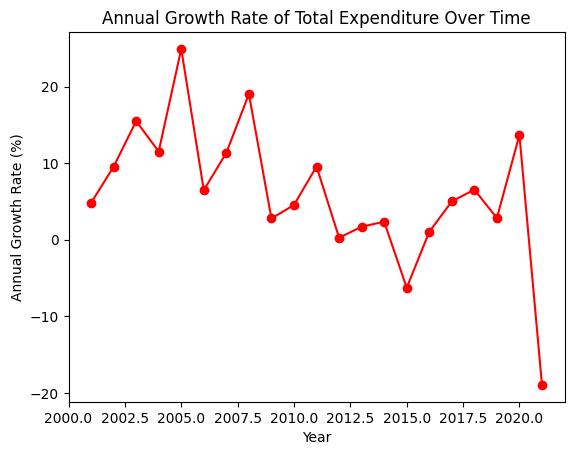

In [129]:

plt.plot(t.index, gr, marker='o', linestyle='-', color='r')
plt.title('Annual Growth Rate of Total Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.show()


# QUESTION 4. Compare the sectoral shares across different years.

# Step 1. Group by 'Year' and 'Sector' and calculate the total expenditure for each sector in each year

In [131]:
s= project.groupby(['Year', 'Sector'])['Expenditure(million USD)'].sum()
s

Year        Sector                                    
2000-01-01  Agriculture, forestry, fishing and hunting       41224
            Communication                                     2195
            Defence                                         507622
            Economic affairs n.e.c.                          10802
            Education                                      1176511
                                                            ...   
2021-01-01  RandD Economic affairs                          115037
            Recreation, culture and religion                383980
            Social protection                              8787043
            Total function                                27435786
            Transport                                       730088
Name: Expenditure(million USD), Length: 440, dtype: int32

# Step 2. Calculate the percentage share for each sector in each year


In [133]:
sp = s / s.groupby('Year').transform('sum') * 100
sp


Year        Sector                                    
2000-01-01  Agriculture, forestry, fishing and hunting     0.250009
            Communication                                  0.013312
            Defence                                        3.078542
            Economic affairs n.e.c.                        0.065510
            Education                                      7.135110
                                                            ...    
2021-01-01  RandD Economic affairs                         0.217230
            Recreation, culture and religion               0.725090
            Social protection                             16.593041
            Total function                                51.808456
            Transport                                      1.378664
Name: Expenditure(million USD), Length: 440, dtype: float64

# Step 3. Pivot the data for better visualization

In [135]:
pivot = sp.unstack()
pivot

Sector,"Agriculture, forestry, fishing and hunting",Communication,Defence,Economic affairs n.e.c.,Education,Environment protection,Fuel and energy,"General economic, commercial and labour affairs",General public services,Health,Housing and community amenities,"Mining, manufacturing and construction",Other industries,Others,Public order and safety,RandD Economic affairs,"Recreation, culture and religion",Social protection,Total function,Transport
Year,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.250009,0.013312,3.078542,0.065510,7.135110,0.452488,0.099757,0.401988,9.011247,7.529711,0.940212,0.091030,0.088720,0.003226,2.406987,0.136448,0.895025,14.778611,51.677245,0.944822
2001-01-01,0.304941,0.026096,3.095124,0.067504,7.189900,0.446753,0.159576,0.468846,8.451159,7.782071,0.928410,0.165073,0.095672,0.146488,2.445212,0.173545,0.871536,14.542600,51.459650,1.179845
2002-01-01,0.289346,0.033550,3.173228,0.070185,7.154240,0.483245,0.144237,0.465506,8.233636,7.877259,0.975952,0.156017,0.097586,0.000063,2.490965,0.188210,0.910457,14.684339,51.352435,1.219545
2003-01-01,0.283604,0.029733,3.203274,0.068944,6.995988,0.507142,0.142623,0.460717,7.894121,7.892264,1.021105,0.182328,0.100461,0.000055,2.436429,0.195676,0.922070,15.059629,51.309786,1.294050
2004-01-01,0.300676,0.029002,3.209891,0.069711,6.863342,0.517226,0.160782,0.459706,7.829006,7.974864,1.023671,0.180316,0.102274,0.000053,2.429659,0.196245,0.932547,15.143886,51.182835,1.394309
2005-01-01,0.470342,0.031140,2.996161,0.052635,6.564216,0.760657,0.168943,0.404919,7.876784,7.902587,1.097620,0.174503,0.181258,0.000049,2.374436,0.208980,0.878656,15.031017,51.345010,1.480085
2006-01-01,0.472727,0.033957,2.980148,0.046644,6.559605,0.706988,0.152318,0.383794,7.894575,7.961070,1.026999,0.177107,0.171752,0.000065,2.399538,0.201794,0.887813,15.055730,51.373270,1.514104
2007-01-01,0.547562,0.039738,2.825042,0.046041,6.386918,0.661144,0.131071,0.378016,7.625660,7.811554,1.305222,0.145012,0.151245,0.000258,2.295236,0.205799,0.882382,14.718066,52.318206,1.525829
2008-01-01,0.540517,0.039735,2.824379,0.079114,6.436019,0.656711,0.170656,0.532652,7.915585,7.806509,1.213324,0.160200,0.150611,0.000247,2.341608,0.190984,0.929614,15.072102,51.252999,1.686433


# Step 4. Plotting the sectoral shares across different years

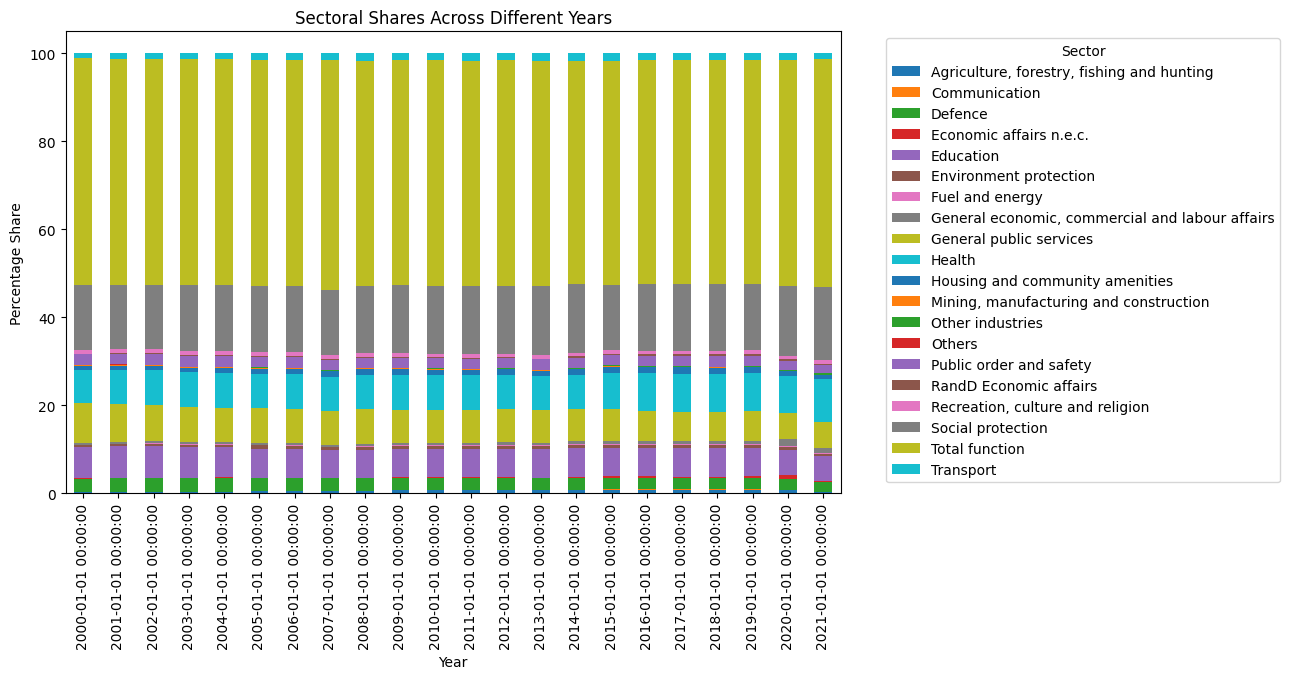

In [137]:
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sectoral Shares Across Different Years')
plt.xlabel('Year')
plt.ylabel('Percentage Share')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the sectoral shares data

In [139]:

print("Sectoral Shares Across Different Years:")
print(pivot)

Sectoral Shares Across Different Years:
Sector      Agriculture, forestry, fishing and hunting  Communication  \
Year                                                                    
2000-01-01                                    0.250009       0.013312   
2001-01-01                                    0.304941       0.026096   
2002-01-01                                    0.289346       0.033550   
2003-01-01                                    0.283604       0.029733   
2004-01-01                                    0.300676       0.029002   
2005-01-01                                    0.470342       0.031140   
2006-01-01                                    0.472727       0.033957   
2007-01-01                                    0.547562       0.039738   
2008-01-01                                    0.540517       0.039735   
2009-01-01                                    0.668566       0.056167   
2010-01-01                                    0.697466       0.044250   
2011-01-01 

 # QUESTION 5.Identify sectors with the highest and lowest shares and analyze the factors influencing their spending patterns.
 
# Step 1. Calculate the total expenditure across all years

In [145]:
total = project.groupby('Sector')['Expenditure(million USD)'].sum()
total

Sector
Agriculture, forestry, fishing and hunting           6132268
Communication                                         358518
Defence                                             25008039
Economic affairs n.e.c.                              2206592
Education                                           59254359
Environment protection                               5957666
Fuel and energy                                      1874381
General economic, commercial and labour affairs      5860159
General public services                             66610621
Health                                              75360455
Housing and community amenities                     11346196
Mining, manufacturing and construction               1235858
Other industries                                     1435404
Others                                                 27521
Public order and safety                             21305081
RandD Economic affairs                               2283942
Recreation, cultu

# Step 2. Calculate the average percentage share for each sector

In [147]:
avg = total / project.groupby('Year')['Expenditure(million USD)'].sum().mean() * 100
avg

Sector
Agriculture, forestry, fishing and hunting           14.658370
Communication                                         0.856990
Defence                                              59.778385
Economic affairs n.e.c.                               5.274564
Education                                           141.639650
Environment protection                               14.241007
Fuel and energy                                       4.480458
General economic, commercial and labour affairs      14.007929
General public services                             159.223814
Health                                              180.139126
Housing and community amenities                      27.121570
Mining, manufacturing and construction                2.954154
Other industries                                      3.431142
Others                                                0.065785
Public order and safety                              50.926957
RandD Economic affairs                          

# Step 3. Identify sectors with the highest and lowest shares

In [153]:
high = avg.idxmax()
low = avg.idxmin()
q=[high,low]
print(f"The sector with the highest share is {high} and the sector with the lowest share is {low}")

The sector with the highest share is Total function and the sector with the lowest share is Others



# Step 4. Analyze factors influencing spending patterns for the highest share sector

In [156]:
highshare = project[project['Sector'] == high]
print(f"\nDetails for the sector with the highest average share:\n{highshare}\n")


Details for the sector with the highest average share:
         S/N       Year                           Country          Sector  \
0          0 2000-01-01                         Australia  Total function   
18        18 2000-01-01                           Austria  Total function   
37        37 2000-01-01                           Belgium  Total function   
47        47 2000-01-01  Bolivia (Plurinational State of)  Total function   
48        48 2000-01-01                            Brazil  Total function   
...      ...        ...                               ...             ...   
25648  25648 2021-01-01                          Thailand  Total function   
25666  25666 2021-01-01                           Türkiye  Total function   
25685  25685 2021-01-01                           Ukraine  Total function   
25704  25704 2021-01-01                    United Kingdom  Total function   
25723  25723 2021-01-01          United States of America  Total function   

       Expenditure(


# Step 5. Analyze factors influencing spending patterns for the lowest share sector

In [157]:
lowshare = project[project['Sector'] == low]
print(f"\nDetails for the sector with the highest average share:\n{lowshare}\n")


Details for the sector with the highest average share:
         S/N       Year                Country  Sector  \
63        63 2000-01-01                 Brazil  Others   
320      320 2000-01-01              Indonesia  Others   
444      444 2000-01-01               Maldives  Others   
606      606 2000-01-01                 Serbia  Others   
755      755 2000-01-01            Timor-Leste  Others   
858      858 2001-01-01                 Brazil  Others   
1132    1132 2001-01-01              Indonesia  Others   
1297    1297 2001-01-01               Maldives  Others   
1486    1486 2001-01-01                 Serbia  Others   
1640    1640 2001-01-01            Timor-Leste  Others   
2090    2090 2002-01-01              Indonesia  Others   
2261    2261 2002-01-01               Maldives  Others   
2503    2503 2002-01-01                 Serbia  Others   
2657    2657 2002-01-01            Timor-Leste  Others   
3281    3281 2003-01-01               Maldives  Others   
3541    3541 200

In [158]:
project.to_csv("./Projects")

In [162]:
# Calculate the total expenditure for each sector across all years
total_expenditure_per_sector = project.groupby('Sector')['Expenditure(million USD)'].sum()

# Calculate the average percentage share for each sector
average_sectoral_share = total_expenditure_per_sector / project.groupby('Year')['Expenditure(million USD)'].sum().mean() * 100

# Identify sectors with the top 5 highest and lowest shares
top_5_highest_sectors = average_sectoral_share.nlargest(5).index
top_5_lowest_sectors = average_sectoral_share.nsmallest(5).index

# Display details for the top 5 highest and lowest sectors
top_5_highest_details = project[project['Sector'].isin(top_5_highest_sectors)]
top_5_lowest_details = project[project['Sector'].isin(top_5_lowest_sectors)]

print("Top 5 Sectors with Highest Average Share:")
print(top_5_highest_details[['Sector', 'Expenditure(million USD)']].drop_duplicates())

# print("\nTop 5 Sectors with Lowest Average Share:")
# print(top_5_lowest_details[['Sector', 'Expenditure(million USD)']].drop_duplicates())


Top 5 Sectors with Highest Average Share:
                        Sector  Expenditure(million USD)
0               Total function                    153122
7                       Health                     24071
8                    Education                     23066
9            Social protection                     43606
10     General public services                     20083
...                        ...                       ...
25723           Total function                  10476081
25726                   Health                   2399530
25727                Education                   1311028
25728        Social protection                   2827585
25729  General public services                   1291640

[7350 rows x 2 columns]
